# Explication de la dotation de solidarité urbaine

La dsu est une dotation versée chaque année par l'état aux communes de plus de 10 000 habitants. 

Ayant à faire face à des charges sociales. Etant considérées défavorisées fiscalement.

## Calcul de l'impact d'un changement législatif sur la DSU

La DSU en simplifié c'est une enveloppe Annuelle. Cette enveloppe à pour objectif d'allouer des recettes (moyens) aux communes ayant a faire face à des charges sociales etant défavorisées fiscalement.

## Formule de la DSU

```
DSU 2019 = DSU 2018 + VENTILATION ABONDEMENT DSU NATIONALE =  DSU 2018 + (VPP  x pop x EF x IS x CR x CZ)

VPP = Valeur de Point (nationale et forfaitaire)
pop = population de la commune (DGF - INSEE)
EF = Effort fiscal (Donnée à partir des fichier Direction générale des collectivités locales)
IS = Indice synthétique (Addition de critères)
CR = Coefficient de Rang
CZ = Coffecient de zone

```

## Calcul d'indice synthétique (1)

Le calcul de l'indice synthétique se fait à partir de 4 critères :

- Le potentiel financier par hab
- Le revenu imposable par habitant
- La part des logements sociaux
- La part des allocation logement

### Le potentiel financier par hab

Le potentiel financier par habitant des communes de plus de 10K habitants / Le potentiel financier par habitant de la commune

In [1]:
_pfi_reference_10000 = 1292.66 #Potentiel Financier de référence au niveau national communes > 10K

In [2]:
pfi_commune = 1101.08 #Potentiel financier de la commune pour laquelle on calcule la dotation (ICI RENNES)

In [3]:
ecart_potentiel_financier_par_hab = _pfi_reference_10000 / pfi_commune

In [4]:
ecart_potentiel_financier_par_hab

1.1739928070621573

### Revenu imposable par habitant

Le revenu imposable par habitant commune plus de 10K hab / Le revenu imposable par habitant de la commune

In [5]:
_ri_reference_10000 = 15396.50 #Le revenu imposable par habitant commune plus de 10K hab

In [6]:
ri_commune = 13041.11 #Le revenu imposable par habitant de la commune (RENNES)

In [7]:
ecart_revenu_imposable_par_hab = _ri_reference_10000 / ri_commune

In [8]:
ecart_revenu_imposable_par_hab

1.18061269324467

### La part des logements sociaux

Part des logements sociaux de la commune / part des logements sociaux de plus de 10K hab

In [9]:
_part_des_logement_sociaux_plus_de_10000 = 0.232031

In [10]:
part_des_logement_sociaux_de_la_commune = 0.262878 #RENNES

In [11]:
ecart_de_pourcentage_de_logements_sociaux = part_des_logement_sociaux_de_la_commune / _part_des_logement_sociaux_plus_de_10000

In [12]:
ecart_de_pourcentage_de_logements_sociaux

1.132943442902026

### La part des allocation logement

Part des allocations logement plus de 10K hab / Part des allocations logements de la commune

In [13]:
_part_des_allocations_logements_plus_de_10000 = 0.515391

In [14]:
part_des_allocations_logements_commune = 0.64369 #RENNES

In [15]:
ecart_de_pourcentage_allocation_logement = part_des_allocations_logements_commune / _part_des_allocations_logements_plus_de_10000

In [16]:
ecart_de_pourcentage_allocation_logement

1.2489352743839142

## Calcul d'indice synthétique (2)

In [17]:
ponderation_potentiel_financier = 0.30 #Possibilité de changé via amendement
ponderation_revenu_imposable  = 0.25
ponderation_logement_sociaux = 0.15
ponderation_allocation_logement = 0.30

In [18]:
c1 = ecart_potentiel_financier_par_hab * ponderation_potentiel_financier
c2 = ecart_revenu_imposable_par_hab * ponderation_revenu_imposable
c3 = ecart_de_pourcentage_de_logements_sociaux * ponderation_logement_sociaux
c4 = ecart_de_pourcentage_allocation_logement * ponderation_allocation_logement

In [19]:
indice_synthetique = c1 + c2 + c3 + c4

In [20]:
indice_synthetique ## !!

1.191973114180293

## Coefficient de rang

In [21]:
_nombre_de_villes_elligibles = 688 

In [22]:
rang_de_la_commune = 313 #Par rapport à l'indice synthétique RENNES (diiférent en fonction de la commune)

In [23]:
numerateur_coeff_rang = ((3.5 * rang_de_la_commune) + 0.5 - (4 * _nombre_de_villes_elligibles))
denominateur_coeff_rang = 1 - _nombre_de_villes_elligibles

In [24]:
coefficient_de_rang = numerateur_coeff_rang / denominateur_coeff_rang

In [25]:
coefficient_de_rang

2.410480349344978

## Coefficient de QPV (Quartier Prioritaire de la Ville)

Exprime la part des habitants des quartiers prioritaires / la population totale de la ville

In [26]:
population_insee_de_la_commune = 222104 #RENNES Fichier DGCL

In [27]:
population_qpv_de_la_commune = 33950 #RENNES Fichier DGCL

In [28]:
coefficient_qpv = 1 + 2*(population_qpv_de_la_commune / population_insee_de_la_commune)

In [29]:
coefficient_qpv

1.305712639124014

### Calcul de l'Abondement

C'est une valeur de point qui est determiné en fonction de l'enveloppe globale à répartir entre toutes les communes. 

Le tout en fonction :

- Des populations des communes eligibles
- Des efforts fiscaux des communes
- Des indices synthétiques
- Des coefficients de QPV

Valeur de point : Valeur déterminée pour que les critères respectent le montant l'enveloppe d'allocation DSU

In [30]:
# ESsayer de retouver le calcul de la valeur de point

In [31]:
_valeur_de_point = 0.57362212 #Modification en fonction des critères de dessus (POUR 2019)

In [32]:
population_dgf = 225358  #Dans fichier DGCL (RENNES)

In [33]:
effort_fiscal_de_la_commune = 1.3  #Dans fichier DGCL - Plafond de 1.3 - (RENNES)

-> TODO: Parametrer le plafond de l'effort fiscal (Rentrer en input) pour tester la valeur ou l'absence de plafonnement

In [34]:
montant_abondement = (indice_synthetique \
                      * population_dgf \
                      * effort_fiscal_de_la_commune \
                      * coefficient_de_rang\
                      * coefficient_qpv \
                      * _valeur_de_point)

In [35]:
montant_abondement

630463.4082033682

## DSU 2019

```
DSU2019 = DSU2018 + Montant Abondement
```

In [36]:
DSU2018 = 9992203 #Dans le fichier DGCL

In [37]:
DSU2019 = DSU2018 + montant_abondement

In [38]:
DSU2019

10622666.408203369

In [3]:
import pandas as pd

In [40]:
df = pd.DataFrame({'part': [montant_abondement, DSU2018]},
                  index=['Abondement', 'DSU2018'])

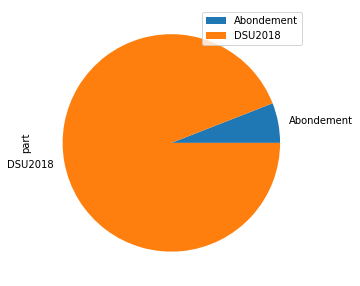

In [41]:
plot = df.plot.pie(y='part', figsize=(5, 5))


# Import fichier

In [4]:
df = pd.read_csv("2019-communes-criteres-repartition.csv", decimal=",")

/root/Bureau/dotation_de_solidarite_urbaine/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
2/3

0.6666666666666666

In [44]:
import numpy as np
#Sont  désormais  éligibles  les  deux  premiers  tiers  des  communes  de  plus  de  10000 habitants  (au  lieu  des  trois  premiers  quarts  auparavant)  et  le  premier  dixième  des communes  de  5000  à  9999 habitants, classées en fonction d’un indice synthétique de ressources et de charges
_nombre_de_villes_elligibles = len(df["RANG_DSU_SUP_10K"].replace(0, np.nan).dropna()) * (2/3) #Les deux tiers de 1032

In [45]:
_nombre_de_villes_elligibles

688.0

In [46]:
df = df.head()
df

,Informations générales - Code INSEE de la commune,Informations générales - Nom de la commune,Informations générales - Code département de la commune,Informations générales - Code SIREN de l'EPCI,Informations générales - Nom de l'EPCI,Informations générales - Exercice,Informations générales - Régime fiscal EPCI,Informations générales - Population DGF Année N',Informations générales - Population INSEE Année N,Informations générales - Résidences secondaires Année N,...,Dotation de solidarité urbaine - Revenu imposable moyen par habitant des communes mét de 5000 à 9999 habitants,Dotation de solidarité urbaine - Valeur de l'indice synthétique de classement de la commune à la DSU,RANG_DSU_SUP_10K,RANG_DSU_5K_A_10K,Dotation de solidarité urbaine - Montant de la garantie effectivement appliquée à la commune,Dotation de solidarité urbaine - Population QPV,Dotation de solidarité urbaine - Population ZFU,Dotation de solidarité urbaine - Montant attribution spontanée DSU,Dotation de solidarité urbaine - Montant progression de la DSU,Dotation de solidarité urbaine - Montant total réparti
0,1001,ABERGEMENT-CLEMENCIAT,1,200069193.0,CC DE LA DOMBES,2019,FPU,800,785,15,...,14861.978197,0.000000,0,0,0,0,0,0,0,0
1,1002,ABERGEMENT-DE-VAREY,1,240100883.0,CC DE LA PLAINE DE L'AIN,2019,FPU,294,244,50,...,14861.978197,0.000000,0,0,0,0,0,0,0,0
2,1004,AMBERIEU-EN-BUGEY,1,240100883.0,CC DE LA PLAINE DE L'AIN,2019,FPU,14702,14518,120,...,14861.978197,1.165206,345,0,0,1739,0,347085,28379,375464
3,1005,AMBERIEUX-EN-DOMBES,1,200042497.0,CC DOMBES SAONE VALLEE,2019,FPU,1717,1705,12,...,14861.978197,0.000000,0,0,0,0,0,0,0,0
4,1006,AMBLEON,1,200040350.0,CC BUGEY SUD,2019,FPU,127,116,11,...,14861.978197,0.000000,0,0,0,0,0,0,0,0


In [13]:
df2 = df[["Informations générales - Nom de la commune",
          "Informations générales - Population DGF Année N'",
          "Informations générales - Population INSEE Année N ",
          "Informations générales - Code département de la commune",
          "Dotation de solidarité urbaine - Nombre de bénéficiaires des aides au logement de la commune",
          "Dotation de solidarité urbaine - Nombre de logements TH de la commune",
          "Dotation de solidarité urbaine - Part des bénéficiaires d'aides au logement par rapport au nombre de logements des communes mét de plus de 10000 habitants",
          "Dotation de solidarité urbaine - Nombre de logements sociaux de la commune",
          "Dotation de solidarité urbaine - Part des logements sociaux dans le total des logements des communes métropolitaines de plus de 10000 habitants",
          "Dotation de solidarité urbaine - Revenu imposable moyen par habitant des communes mét de plus de 10 000 habitants",
          "Dotation de solidarité urbaine - Revenu imposable par habitant",
          "Dotation de solidarité urbaine - Potentiel financier moyen par habitant des communes métropolitaines de plus de 10000 habitants",
          "Potentiel fiscal et financier des communes - Potentiel financier par habitant",
          "EFFORT_FISCAL",
          "RANG_DSU_SUP_10K",
          "RANG_DSU_5K_A_10K",
          "Dotation de solidarité urbaine - Montant attribution spontanée DSU"
         ]]

In [48]:
for d in df.columns:
    print(d)

Informations générales - Code INSEE de la commune
Informations générales - Nom de la commune
Informations générales - Code département de la commune
Informations générales - Code SIREN de l'EPCI
Informations générales - Nom de l'EPCI
Informations générales - Exercice
Informations générales - Régime fiscal EPCI
Informations générales - Population DGF Année N'
Informations générales - Population INSEE Année N 
Informations générales - Résidences secondaires Année N
Informations générales - Places de caravanes Année N
Informations générales - Strate démographique Année N
Informations générales - Superficie 2019
Potentiel fiscal et financier des communes - Potentiel fiscal 3 taxes
Potentiel fiscal et financier des communes - Potentiel fiscal 4 taxes
Potentiel fiscal et financier des communes - Potentiel fiscal 4 taxes par habitant
Potentiel fiscal et financier des communes - Potentiel financier
Potentiel fiscal et financier des communes - Potentiel financier par habitant
Potentiel fiscal e

In [49]:
df2

,Informations générales - Nom de la commune,Informations générales - Population DGF Année N',Informations générales - Population INSEE Année N,Informations générales - Code département de la commune,Dotation de solidarité urbaine - Nombre de bénéficiaires des aides au logement de la commune,Dotation de solidarité urbaine - Nombre de logements TH de la commune,Dotation de solidarité urbaine - Part des bénéficiaires d'aides au logement par rapport au nombre de logements des communes mét de plus de 10000 habitants,Dotation de solidarité urbaine - Nombre de logements sociaux de la commune,Dotation de solidarité urbaine - Part des logements sociaux dans le total des logements des communes métropolitaines de plus de 10000 habitants,Dotation de solidarité urbaine - Revenu imposable moyen par habitant des communes mét de plus de 10 000 habitants,Dotation de solidarité urbaine - Revenu imposable par habitant,Dotation de solidarité urbaine - Potentiel financier moyen par habitant des communes métropolitaines de plus de 10000 habitants,Potentiel fiscal et financier des communes - Potentiel financier par habitant,EFFORT_FISCAL,RANG_DSU_SUP_10K,RANG_DSU_5K_A_10K,Dotation de solidarité urbaine - Montant attribution spontanée DSU
0,ABERGEMENT-CLEMENCIAT,800,785,1,50,334,0.515391,22,0.232031,15396.50086,15554.129936,1292.661052,593.907500,0.873822,0,0,0
1,ABERGEMENT-DE-VAREY,294,244,1,20,158,0.515391,0,0.232031,15396.50086,15846.807377,1292.661052,731.578231,0.719266,0,0,0
2,AMBERIEU-EN-BUGEY,14702,14518,1,4179,6936,0.515391,1856,0.232031,15396.50086,13412.456743,1292.661052,1093.845395,1.036655,345,0,347085
3,AMBERIEUX-EN-DOMBES,1717,1705,1,184,676,0.515391,33,0.232031,15396.50086,14992.326686,1292.661052,700.956319,1.062563,0,0,0
4,AMBLEON,127,116,1,5,67,0.515391,0,0.232031,15396.50086,15132.862069,1292.661052,574.165354,0.904348,0,0,0


In [17]:
choix_ville = input("Choix de la ville : ")

Choix de la ville : BRETEUIL


In [32]:
departement = input("Numero du département à deux chiffre ex 67 : ")

Numero du département à deux chiffre ex 67 : 60


In [14]:
dfcity = df2.loc[df2["Informations générales - Nom de la commune"] == choix_ville]

In [15]:
dfcity

,Informations générales - Nom de la commune,Informations générales - Population DGF Année N',Informations générales - Population INSEE Année N,Informations générales - Code département de la commune,Dotation de solidarité urbaine - Nombre de bénéficiaires des aides au logement de la commune,Dotation de solidarité urbaine - Nombre de logements TH de la commune,Dotation de solidarité urbaine - Part des bénéficiaires d'aides au logement par rapport au nombre de logements des communes mét de plus de 10000 habitants,Dotation de solidarité urbaine - Nombre de logements sociaux de la commune,Dotation de solidarité urbaine - Part des logements sociaux dans le total des logements des communes métropolitaines de plus de 10000 habitants,Dotation de solidarité urbaine - Revenu imposable moyen par habitant des communes mét de plus de 10 000 habitants,Dotation de solidarité urbaine - Revenu imposable par habitant,Dotation de solidarité urbaine - Potentiel financier moyen par habitant des communes métropolitaines de plus de 10000 habitants,Potentiel fiscal et financier des communes - Potentiel financier par habitant,EFFORT_FISCAL,RANG_DSU_SUP_10K,RANG_DSU_5K_A_10K,Dotation de solidarité urbaine - Montant attribution spontanée DSU
9424,BRETEUIL,4762,4624,27,1004,2080,0.515391,308,0.232031,15396.50086,11211.910467,1292.661052,704.103738,1.691745,0,0,0
22557,BRETEUIL,4588,4559,60,1568,1964,0.515391,615,0.232031,15396.50086,10095.914016,1292.661052,822.756321,1.494113,0,0,0


In [18]:
choix_ville, departement

('BRETEUIL', '60')

In [33]:
df.loc[(df["Informations générales - Nom de la commune"] == choix_ville ) & (df["Informations générales - Code département de la commune"] == int(departement))]

,Informations générales - Code INSEE de la commune,Informations générales - Nom de la commune,Informations générales - Code département de la commune,Informations générales - Code SIREN de l'EPCI,Informations générales - Nom de l'EPCI,Informations générales - Exercice,Informations générales - Régime fiscal EPCI,Informations générales - Population DGF Année N',Informations générales - Population INSEE Année N,Informations générales - Résidences secondaires Année N,...,Dotation de solidarité urbaine - Revenu imposable moyen par habitant des communes mét de 5000 à 9999 habitants,Dotation de solidarité urbaine - Valeur de l'indice synthétique de classement de la commune à la DSU,RANG_DSU_SUP_10K,RANG_DSU_5K_A_10K,Dotation de solidarité urbaine - Montant de la garantie effectivement appliquée à la commune,Dotation de solidarité urbaine - Population QPV,Dotation de solidarité urbaine - Population ZFU,Dotation de solidarité urbaine - Montant attribution spontanée DSU,Dotation de solidarité urbaine - Montant progression de la DSU,Dotation de solidarité urbaine - Montant total réparti
22557,60104,BRETEUIL,60,200068005.0,CC DE L'OISE PICARDE,2019,FPU,4588,4559,29,...,14861.978197,0.0,0,0,0,0,0,0,0,0


# Tout en 1

In [53]:
import pandas as pd

In [54]:
potentiel_de_la_commune = dfcity["Potentiel fiscal et financier des communes - Potentiel financier par habitant"].values[0]
revenu_imposable_commune = dfcity["Dotation de solidarité urbaine - Revenu imposable par habitant"].values[0]

In [55]:
potentiel_de_la_commune, revenu_imposable_commune

(1093.8453949999998, 13412.456743)

In [56]:
part_logement_sociaux = dfcity["Dotation de solidarité urbaine - Nombre de logements sociaux de la commune"].values[0]\
/dfcity["Dotation de solidarité urbaine - Nombre de logements TH de la commune"].values[0]

part_allocation_commune = dfcity["Dotation de solidarité urbaine - Nombre de bénéficiaires des aides au logement de la commune"].values[0]\
/dfcity["Dotation de solidarité urbaine - Nombre de logements TH de la commune"].values[0]

In [57]:
part_logement_sociaux, part_allocation_commune

(0.2675893886966551, 0.6025086505190311)

In [58]:
population_dgf_commune = dfcity["Informations générales - Population DGF Année N'"].values[0]
population_insee_commune = dfcity["Informations générales - Population INSEE Année N "].values[0]
beneficiaires_aide_au_logement_commune = dfcity["Dotation de solidarité urbaine - Nombre de bénéficiaires des aides au logement de la commune"].values[0]
leffort_fiscal = dfcity["EFFORT_FISCAL"].values[0]

dsu_annee_precedente = dfcity["Dotation de solidarité urbaine - Montant attribution spontanée DSU"].values[0]

if population_insee_commune > 10000:
    rang = dfcity["RANG_DSU_SUP_10K"].values[0]
elif population_insee_commune > 5000 and population_insee_commune < 10000:
    rang = dfcity["RANG_DSU_5K_A_10K"].values[0]
else:
    print("Moins de 10 000 habitants")

In [59]:
population_dgf_commune, population_insee_commune, beneficiaires_aide_au_logement_commune, leffort_fiscal

(14702, 14518, 4179, 1.0366549999999999)

DSU 2019 : 383159.7177739274


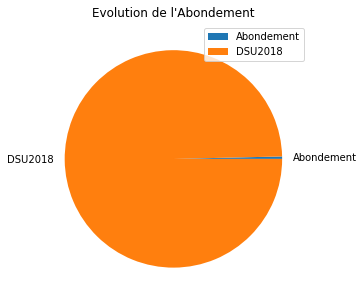

In [60]:
_pfi_reference_10000 = 1292.66 #Potentiel Financier de référence au niveau national communes > 10K
pfi_commune = potentiel_de_la_commune #Potentiel financier de la commune pour laquelle on calcule la dotation (ICI RENNES)
ecart_potentiel_financier_par_hab = _pfi_reference_10000 / pfi_commune

_ri_reference_10000 = 15396.50 #Le revenu imposable par habitant commune plus de 10K hab
ri_commune = revenu_imposable_commune #Le revenu imposable par habitant de la commune 
ecart_revenu_imposable_par_hab = _ri_reference_10000 / ri_commune

_part_des_logement_sociaux_plus_de_10000 = 0.232031
part_des_logement_sociaux_de_la_commune = part_logement_sociaux
ecart_de_pourcentage_de_logements_sociaux = part_des_logement_sociaux_de_la_commune / _part_des_logement_sociaux_plus_de_10000

_part_des_allocations_logements_plus_de_10000 = 0.515391
part_des_allocations_logements_commune = part_allocation_commune #RENNES
ecart_de_pourcentage_allocation_logement = part_des_allocations_logements_commune / _part_des_allocations_logements_plus_de_10000

ponderation_potentiel_financier = 0.30 #Possibilité de changé via amendement
ponderation_revenu_imposable  = 0.25
ponderation_logement_sociaux = 0.15
ponderation_allocation_logement = 0.30

c1 = ecart_potentiel_financier_par_hab * ponderation_potentiel_financier
c2 = ecart_revenu_imposable_par_hab * ponderation_revenu_imposable
c3 = ecart_de_pourcentage_de_logements_sociaux * ponderation_logement_sociaux
c4 = ecart_de_pourcentage_allocation_logement * ponderation_allocation_logement

indice_synthetique = c1 + c2 + c3 + c4

rang_de_la_commune = rang #Par rapport à l'indice synthétique RENNES (diiférent en fonction de la commune)
numerateur_coeff_rang = ((3.5 * rang_de_la_commune) + 0.5 - (4 * _nombre_de_villes_elligibles))
denominateur_coeff_rang = 1 - _nombre_de_villes_elligibles

coefficient_de_rang = numerateur_coeff_rang / denominateur_coeff_rang

population_insee_de_la_commune = population_insee_commune
population_qpv_de_la_commune = beneficiaires_aide_au_logement_commune
coefficient_qpv = 1 + 2*(population_qpv_de_la_commune / population_insee_de_la_commune)

# ESsayer de retouver le calcul de la valeur de point
_valeur_de_point = 0.57362212 #Modification en fonction des critères de dessus (POUR 2019)
population_dgf = population_dgf_commune  #Dans fichier DGCL 
effort_fiscal_de_la_commune = leffort_fiscal if leffort_fiscal < 1.3 else 1.3  #Dans fichier DGCL - Plafond de 1.3

montant_abondement = (indice_synthetique \
                      * population_dgf \
                      * effort_fiscal_de_la_commune \
                      * coefficient_de_rang\
                      * coefficient_qpv \
                      * _valeur_de_point)

DSU2019 = dsu_annee_precedente + montant_abondement
print(f"DSU 2019 : {DSU2019}")

df = pd.DataFrame({'': [montant_abondement, DSU2018]},
                  index=['Abondement', 'DSU2018'])
plot = df.plot.pie(y='', title="Evolution de l'Abondement", figsize=(5, 5))

In [ ]:
10% des villes de 5 a 10k